In [23]:
import os

try:
    has_changed_dir
except:
    has_changed_dir = False

try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False

if IN_COLAB:
    %pip install datasets
    %pip install translate-toolkit
    #%pip install bitsandbytes

    !git clone https://github.com/MartinKirkegaardDK/KDS_MI.git

    if not has_changed_dir:
        os.chdir('KDS_MI')
        has_changed_dir = True
else:
    if not has_changed_dir:
        os.chdir('.')
        has_changed_dir = True

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from drivers import preprocessing,probe_confidence_intervals, steering, create_steering_vectors, steering_loss


## preprocessing

In [ ]:
preprocessing.run()

## probe_confidence_intervals

In [ ]:
probe_confidence_intervals.run()

## Create steering vector

In [ ]:
create_steering_vectors.run(
    model_name="EleutherAI/pythia-14m",
    target_language="nb", 
    complement_languages=["is","da","en","sv"], 
    run_name="NB_PYTHIA"
)

Load model
found device: cpu
Load data


 38%|███▊      | 6/16 [00:06<00:11,  1.12s/it]


## Test steering vectors

In [42]:
steering_vector_path = "steering_vectors/DA_PYTHIA/combined_steering_vector_layer_4_tensor.pt"
model_name = 'EleutherAI/pythia-14m'

steering.run(
    steering_vector_path=steering_vector_path,
    steering_lambda=5,
    affected_language="en",
    layer=4,
    model_name=model_name,
    data_folder='data/preprocessed/train'
)

found device: cpu


c:\Users\Bruger\Code\mechinterp\KDS_MI\drivers\steering.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  


In a pooled analysis of antibiotic stewardship programmes, re-engagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagagag 


a) Following local evidence-based antibiotic guidelines for the drug.    For    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fommer    fom 


Professionals in emergency departments should only start antibiotic therapy, but he failed to recommend for    “He succeeded in a second of the last he succeeded in a second of his first-day,    “Gresser    “Kombeded the last-day    “A-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D- 


For patients with sepsis, initiate effective antibiotic treatment via drug therapy with drug therapy.    Finder    Finder    Finder    Finder    Finder    Finder    Finder    Finder    Finder    Finder    Finder    Finder    Finder 

## Measure steering vector loss impact

found device: cpu


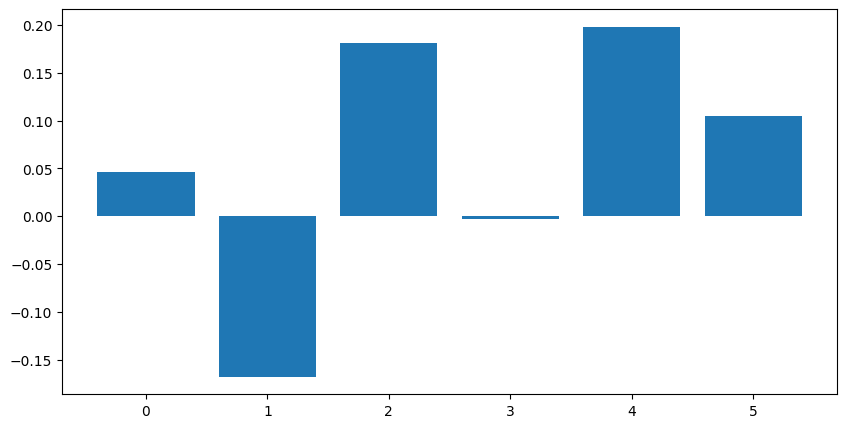

In [41]:
steering_vector_folder = 'steering_vectors/DA_PYTHIA'

steering_loss.run(
    steering_vector_folder=steering_vector_folder,
    model_name='EleutherAI/pythia-14m',
    steering_lambda=5
)

## Plot steering vector PCAs